## Light GBM model vs XGBoost Model

### 1.Light GBM model

- **Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.**
- [Reference Link](https://lightgbm.readthedocs.io/en/latest/), [GitHub](https://github.com/Microsoft/LightGBM) 
- **Key Features:**
  - **Many boosting tools use pre-sort-based algorithms(e.g. default algorithm in xgboost) for decision tree learning. It is a simple solution, but not easy to optimize.**
  - **LightGBM uses histogram-based algorithms, which bucket continuous feature (attribute) values into discrete bins. This speeds up training and reduces memory usage. Advantages of histogram-based algorithms include the following:**
    - Reduced cost of calculating the gain for each split
    - Use histogram subtraction for further speedup
    - Reduce memory usage
    - Reduce communication cost for parallel learning
  - **LightGBM grows trees leaf-wise (best-first). It will choose the leaf with max delta loss to grow. Holding #leaf fixed, leaf-wise algorithms tend to achieve lower loss than level-wise algorithms.**
  - **LightGBM supports the following applications:**
      - regression, the objective function is L2 loss
      - binary classification, the objective function is logloss
      - multi classification
      - cross-entropy, the objective function is logloss and supports training on non-binary labels
      - lambdarank, the objective function is lambdarank with NDCG   
      
### Tuning Light GBM parameters   
- Light GBM uses leaf wise splitting over depth wise splitting which enables it to converge much faster but also leads to overfitting. So here is a quick guide to tune the parameters in Light GBM.

- For best fit
    - **num_leaves:** Light GBM model is to split leaf-wise nodes rather than depth-wise. Hence num_leaves set must be smaller than 2^(max_depth) otherwise it may lead to overfitting. Light GBM does not have a direct relation between num_leaves and max_depth and hence the two must not be linked with each other.
    - **min_data_in_leaf:** Key parameter to avoid overfitting. Setting its value smaller may cause overfitting and hence must be set accordingly. Its value should be hundreds to thousands of large datasets.
    - **max_depth:** It specifies the maximum depth or level up to which tree can grow.
 

- For faster speed
    - **bagging_fraction:** Is used to perform bagging for faster results
    - **feature_fraction:** Set fraction of the features to be used at each iteration
    - **max_bin:** Smaller value of max_bin can save much time as it buckets the feature values in discrete bins which is computationally inexpensive.
 

- For better accuracy
    - **more training data**
    - **num_leaves:** Setting it to high value produces deeper trees with increased accuracy but lead to overfitting. Hence its higher value is not preferred.
    - **max_bin:** Setting it to high values has similar effect as caused by increasing value of num_leaves and also slower our training procedure

### 2. XGBoost Model

- **XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.**
- [Reference Link](https://xgboost.readthedocs.io/en/latest/), [GitHub](https://github.com/dmlc/xgboost),[Tutorials](https://github.com/dmlc/xgboost/tree/master/demo#tutorials)
- **Key Features:**
    - **Gradient Boosting algorithm also called gradient boosting machine including the learning rate.**
    - **Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.**
    - **Regularized Gradient Boosting with both L1 and L2 regularization.**
    - **Sparse Aware - Handling missing values** implementation with automatic handling of missing data values.
    - **Block Structure** to support the parallelization of tree construction.
    - **Continued Training** so that you can further boost an already fitted model on new data.
    - **Tree Pruning:** A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm. XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    - **Built-in Cross-Validation**  XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    

### Tuning XGBoost parameters

- ***General Parameters***
    - **booster [default=gbtree]**   
        Select the type of model to run at each iteration. It has 2 options:
            gbtree: tree-based models
            gblinear: linear models
    - **silent [default=0]:**   
        Silent mode is activated is set to 1, i.e. no running messages will be printed.It’s generally good to keep it 0 as the messages might help in understanding the model.
    - **nthread [default to maximum number of threads available if not set]**   
        This is used for parallel processing and number of cores in the system should be entered.If you wish to run on all cores, value should not be entered and algorithm will detect automatically
 

- **Booster Parameters**

    - **eta [default=0.3]**   
        Analogous to learning rate in GBM. Makes the model more robust by shrinking the weights on each step.Typical final values to be used: 0.01-0.2
    - **min_child_weight [default=1]**   
        Defines the minimum sum of weights of all observations required in a child. This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.Too high values can lead to under-fitting hence, it should be tuned using CV.
    - **max_depth [default=6]**   
        The maximum depth of a tree, same as GBM.Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.Should be tuned using CV.Typical values: 3-10
    - **max_leaf_nodes**   
        The maximum number of terminal nodes or leaves in a tree.Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.If this is defined, GBM will ignore max_depth.
    - **gamma [default=0]**   
        A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
    - **max_delta_step [default=0]**   
        In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
    - **subsample [default=1]**   
        Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Typical values: 0.5-1
    - **colsample_bytree [default=1]**   
        Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.Typical values: 0.5-1
    - **colsample_bylevel [default=1]**   
        Denotes the subsample ratio of columns for each split, in each level.
    - **lambda [default=1]**   
        L2 regularization term on weights (analogous to Ridge regression) This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.
    - **alpha [default=0]**   
        L1 regularization term on weight (analogous to Lasso regression). Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
    - **scale_pos_weight [default=1]**   
        A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
 

- **Learning Task Parameters**
These parameters are used to define the optimization objective the metric to be calculated at each step.

    - **objective [default=reg:linear]**   
        This defines the loss function to be minimized. Mostly used values are:
            binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
            multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities)
        you also need to set an additional num_class (number of classes) parameter defining the number of unique classes. multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.
    - **eval_metric [ default according to objective ]**   
        The metric to be used for validation data.The default values are rmse for regression and error for classification.
        Typical values are:
            **rmse** – root mean square error
            **mae** – mean absolute error
            **logloss** – negative log-likelihood
            **error** – Binary classification error rate (0.5 threshold)
            **merror** – Multiclass classification error rate
            **mlogloss** – Multiclass logloss
            **auc**: Area under the curve
    - **seed [default=0]**   
        The random number seed.Can be used for generating reproducible results and also for parameter tuning.

    

    
### 3. "Census Income" Dataset to test Light GBM and XGBoost model






In [23]:
#importing standard lib
raries 
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame 

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 


## "Census Income" Dataset to test Light GBM and XGBoost model

#### -  Dataset Source :[http://archive.ics.uci.edu/ml/datasets/Adult](http://archive.ics.uci.edu/ml/datasets/Adult)

#### - Data Set Information:
- Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

####  - Prediction task is to determine whether a person makes over 50K a year. 



In [7]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df = pd.read_csv(data_url,header=None) 

### Feature Engineering 

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital_Status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Income'] 
df.head()

,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Label Encoding our target variable 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [11]:
label = LabelEncoder()
label.fit(df.Income)


,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
label.classes_

array([' <=50K', ' >50K'], dtype=object)

In [14]:
df['Income'] = pd.Series(label.transform(df['Income']))
df.head()

,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [15]:
df['Income'].value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [16]:
#One Hot Encoding of the Categorical features

one_hot_workclass = pd.get_dummies(df.workclass)
one_hot_education=pd.get_dummies(df.education) 
one_hot_marital_Status=pd.get_dummies(df.marital_Status) 
one_hot_occupation=pd.get_dummies(df.occupation)
one_hot_relationship=pd.get_dummies(df.relationship) 
one_hot_race=pd.get_dummies(df.race) 
one_hot_sex=pd.get_dummies(df.sex) 
one_hot_native_country=pd.get_dummies(df.native_country) 


In [18]:
#removing categorical features 
df.drop(['workclass','education','marital_Status','occupation','relationship','race','sex','native_country'],axis=1,inplace=True) 
df.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [19]:

#Merging one hot encoded features with our dataset 'data' 
df =pd.concat([df,one_hot_workclass,one_hot_education,one_hot_marital_Status,one_hot_occupation,one_hot_relationship,one_hot_race,one_hot_sex,one_hot_native_country],axis=1) 
df.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,Income,?,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#removing dulpicate columns 
_,i = np.unique(df.columns, return_index= True)
df = df.iloc[:,i]
df.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,?,Adm-clerical,Amer-Indian-Eskimo,...,Wife,Without-pay,Yugoslavia,Income,age,capital_gain,capital_loss,education-num,fnlwgt,hours_per_week
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,39,2174,0,13,77516,40
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,50,0,0,13,83311,13
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,38,0,0,9,215646,40
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,53,0,0,7,234721,40
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,28,0,0,13,338409,40


In [25]:
_

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' ?', ' Adm-clerical', ' Amer-Indian-Eskimo',
       ' Armed-Forces', ' Asian-Pac-Islander', ' Assoc-acdm',
       ' Assoc-voc', ' Bachelors', ' Black', ' Cambodia', ' Canada',
       ' China', ' Columbia', ' Craft-repair', ' Cuba', ' Divorced',
       ' Doctorate', ' Dominican-Republic', ' Ecuador', ' El-Salvador',
       ' England', ' Exec-managerial', ' Farming-fishing', ' Federal-gov',
       ' Female', ' France', ' Germany', ' Greece', ' Guatemala',
       ' HS-grad', ' Haiti', ' Handlers-cleaners', ' Holand-Netherlands',
       ' Honduras', ' Hong', ' Hungary', ' Husband', ' India', ' Iran',
       ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Local-gov',
       ' Machine-op-inspct', ' Male', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Masters',
       ' Mexico', ' Never-married', ' Never-worked', ' Nicaragua',
       ' Not-in-family', ' Other', ' Othe

In [29]:
# Feature
x = df.drop('Income',axis =1)
#target
y = df.Income

In [30]:

#Imputing missing values in our target variable 
y.fillna(y.mode()[0],inplace=True) 


/Users/my_macbook/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
y[0]

0

In [31]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

### Applying the xgboost model

In [36]:
dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test)

In [37]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 

xg=xgb.train(parameters,dtrain,num_round) 

stop = datetime.now()


In [38]:
#Execution time of the model 
execution_time_xgb = stop-start 

#datetime.timedelta( , , ) representation => (days , seconds , microseconds) 

execution_time_xgb

datetime.timedelta(0, 4, 14385)

In [39]:

ypred=xg.predict(dtest) 
ypred


array([0.43823165, 0.69191957, 0.05487955, ..., 0.11356781, 0.5278397 ,
       0.37293717], dtype=float32)

In [40]:
maxProb = np.amax(ypred)
maxProb

0.957543

In [44]:
#Converting probabilities into 1 or 0  
threshold = 0.5
for i in range(0,len(ypred)):
    if ypred[i] >= threshold:
        ypred[i] = 1
    else:
        ypred[i] = 0


In [46]:
#calculating accuracy of our model 

from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test,ypred)
accuracy_xgb

0.8630361347118436

### Applying Light GBM Model

In [47]:
# Setting the training data

train_data = lgb.Dataset(x_train,label = y_train)

# Setting the parameters for LightGBM
param = {'num_leaves':150,'objective':'binary','max_depth':7,'learning_rate':0.5,'max_bin':200}
param['metric'] = ['auc','binary_logloss']


In [48]:
# training 
num_round =50
start = datetime.now()

lgbm = lgb.train(param,train_data,num_round)

stop = datetime.now()

#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(0, 0, 285445)

In [49]:
# Predicting

ypred_lgbm = lgbm.predict(x_test)
ypred_lgbm

array([4.16206836e-01, 7.48779504e-01, 7.33607520e-04, ...,
       1.51250635e-02, 6.94971084e-01, 3.21433165e-01])

In [50]:
#Converting probabilities into 1 or 0  
threshold = 0.5
for i in range(0,len(ypred_lgbm)):
    if ypred_lgbm[i] >= threshold:
        ypred_lgbm[i] = 1
    else:
        ypred_lgbm[i] = 0
        
accuracy_lgbm = accuracy_score(ypred_lgbm,y_test)
accuracy_lgbm



0.8675401781144436

In [53]:
from sklearn.metrics import roc_auc_score

auc_lgbm = roc_auc_score(y_test,ypred_lgbm)
auc_lgbm

0.796823730212173

In [54]:
auc_xgb = roc_auc_score(y_test,ypred)
auc_xgb

0.767090530303117

In [56]:
compare_dict = {'accuracy scores:':(accuracy_lgbm,accuracy_xgb),\
                'auc scores:':(auc_lgbm,auc_xgb),\
                'execute time:':(execution_time_lgbm,execution_time_xgb)}
compare_dict

{'accuracy scores:': (0.8675401781144436, 0.8630361347118436),
 'auc scores:': (0.796823730212173, 0.767090530303117),
 'execute time:': (datetime.timedelta(0, 0, 285445),
  datetime.timedelta(0, 4, 14385))}

In [57]:
LightGBM_vs_xgboost = pd.DataFrame(compare_dict)
LightGBM_vs_xgboost.index = ['LightGBM','xgboost']
LightGBM_vs_xgboost

,accuracy scores:,auc scores:,execute time:
LightGBM,0.867540,0.796824,00:00:00.285445
xgboost,0.863036,0.767091,00:00:04.014385


### Plot the ROC curve

In [66]:
from sklearn.metrics import roc_curve, auc


fpr_lgbm,tpr_lgbm, threshold = roc_curve(y_test,ypred_lgbm)



In [72]:
roc_auc_lgbm = auc(fpr_lgbm,tpr_lgbm)    

roc_auc_lgbm


0.796823730212173

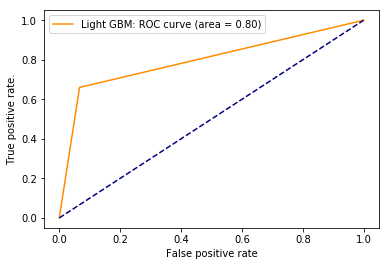

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotROC(tpr, fpr, label=''):
    """
    Plot ROC curve from tpr and fpr.
    """
    plt.plot(fpr, tpr, color='darkorange',label=label)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')

    plt.legend()
    plt.ylabel('True positive rate.')
    plt.xlabel('False positive rate')
    plt.show()

label_lgbm = 'Light GBM: ROC curve (area = %0.2f)'%roc_auc_lgbm
plotROC(tpr_lgbm,fpr_lgbm,label_lgbm)    


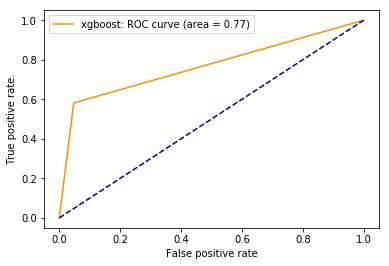

In [77]:
fpr_xgb,tpr_xgb, threshold = roc_curve(y_test,ypred)

roc_auc_xgb = auc(fpr_xgb,tpr_xgb)

label_xgboost = 'xgboost: ROC curve (area = %0.2f)'%roc_auc_xgb
plotROC(tpr_xgb,fpr_xgb,label_xgboost)    


